# Submussion Belajar Machine Learning untuk Pemula
## Data Diri

* **Nama :** Abdul Jalil Rozaqi
* **Email :** jalilrzq@gmail.com
* **Daerah :** Siak, Riau





In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.callbacks import EarlyStopping
from google.colab import files
from keras.preprocessing import image
import zipfile, os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
print(tf.__version__)

2.4.1


In [3]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-11 21:17:01--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.56MB/s    in 5m 7s   

2021-05-11 21:22:09 (1.00 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [7]:
# Ekstraksi File zip
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [8]:
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['scissors', 'README_rpc-cv-images.txt', 'paper', 'rock']

In [9]:
train_datagen = ImageDataGenerator(
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    brightness_range=(0.3, 0.9),
    zoom_range = 20,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    brightness_range=(0.3, 0.9),
    zoom_range = 20,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [10]:
 datagen = ImageDataGenerator(validation_split= 0.4, rescale=1./255)

In [11]:
train_generator = datagen.flow_from_directory(
  directory = base_dir,  # direktori data latih
  target_size=(100, 150),  
  batch_size= 8,
  subset = 'training',
  class_mode='categorical')
     
validation_generator = datagen.flow_from_directory(
  directory = base_dir,  # direktori data validation
  target_size=(100, 150),  
  batch_size= 8,
  subset = 'validation',
  class_mode='categorical')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [12]:
imgs, labels = next(train_generator)

In [13]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(30,30))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

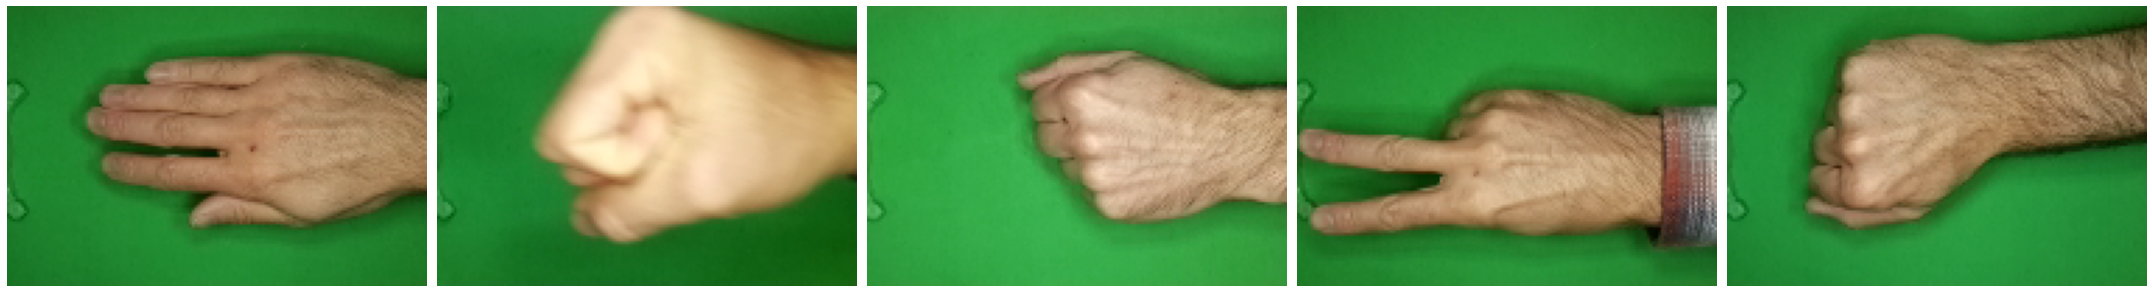

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [14]:
plotImages(imgs)
print(labels)

In [15]:
model = tf.keras.models.Sequential([
  Conv2D(32, (3,3), activation='relu', input_shape=(100, 150, 3)),
  MaxPool2D(2, 2),
  Conv2D(64, (3,3), activation='relu'),
  MaxPool2D(2,2),
  Conv2D(128, (3,3), activation='relu'),
  MaxPool2D(2,2),
  Conv2D(128, (3,3), activation='relu'),
  MaxPool2D(2,2),
  Dropout(0.2),
  Flatten(),
  Dense(512, activation='relu'),
  Dense(3, activation='softmax')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 148, 32)       896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 15, 128)        1

In [17]:
model.compile(loss='binary_crossentropy',
  optimizer=tf.optimizers.Adam(),
  metrics=['accuracy'])

In [18]:
#Callback menggunakan EarlyStopping
call = EarlyStopping(monitor='val_loss', mode='min',verbose=1, patience=10)

In [19]:
hist = model.fit(
  train_generator,
  steps_per_epoch=25,
  epochs=50,
  validation_data=validation_generator,
  validation_steps=10,
  verbose=2,
  callbacks=[call])

Epoch 1/50
25/25 - 34s - loss: 0.6670 - accuracy: 0.3505 - val_loss: 0.6202 - val_accuracy: 0.3875
Epoch 2/50
25/25 - 1s - loss: 0.5357 - accuracy: 0.6100 - val_loss: 0.3759 - val_accuracy: 0.7000
Epoch 3/50
25/25 - 1s - loss: 0.2640 - accuracy: 0.8650 - val_loss: 0.2401 - val_accuracy: 0.8625
Epoch 4/50
25/25 - 1s - loss: 0.1439 - accuracy: 0.9200 - val_loss: 0.1893 - val_accuracy: 0.9125
Epoch 5/50
25/25 - 1s - loss: 0.1673 - accuracy: 0.9250 - val_loss: 0.2173 - val_accuracy: 0.8250
Epoch 6/50
25/25 - 1s - loss: 0.1029 - accuracy: 0.9400 - val_loss: 0.0772 - val_accuracy: 0.9500
Epoch 7/50
25/25 - 1s - loss: 0.1032 - accuracy: 0.9350 - val_loss: 0.0875 - val_accuracy: 0.9625
Epoch 8/50
25/25 - 1s - loss: 0.1159 - accuracy: 0.9500 - val_loss: 0.0873 - val_accuracy: 0.9625
Epoch 9/50
25/25 - 1s - loss: 0.0878 - accuracy: 0.9588 - val_loss: 0.0164 - val_accuracy: 1.0000
Epoch 10/50
25/25 - 1s - loss: 0.0457 - accuracy: 0.9742 - val_loss: 0.1398 - val_accuracy: 0.9500
Epoch 11/50
25/25 

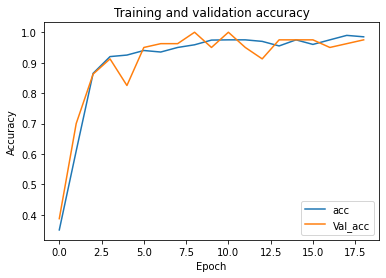

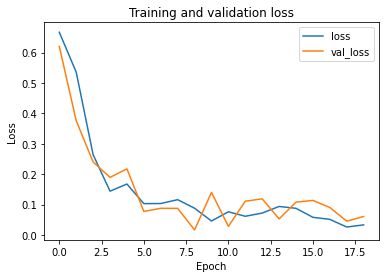

In [20]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='acc')
plt.plot(epochs, val_acc, label='Val_acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend();

plt.figure()

plt.plot(epochs, loss, label='loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend();

Saving rock.png to rock.png
rock.png
ini batu


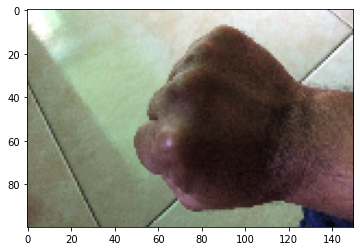

In [21]:
#Pengujian Model Klasifikasi dengan Data yang baru

uploaded = files.upload()

for fn in uploaded.keys():

  #Predict Image
  path = fn
  img = image.load_img(path, target_size=(100, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  hasil = np.argmax(classes)

  print(fn)
  if hasil == 0:
    print('ini kertas')
  elif hasil == 1:
    print('ini batu')
  elif hasil == 2:
    print('ini gunting')